In [13]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [10]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [14]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

### EDA

In [34]:
data=pd.read_csv('data/heart (1) (2) (1).csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [19]:
data.shape

(1025, 14)

In [20]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Outlier handling

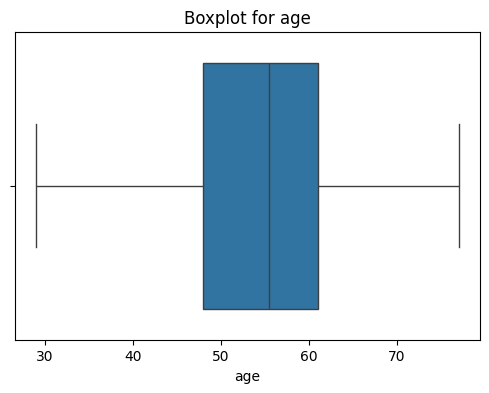

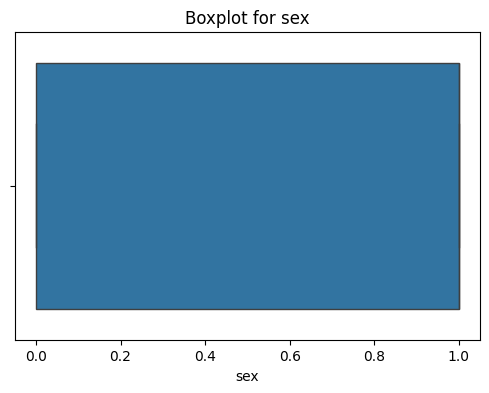

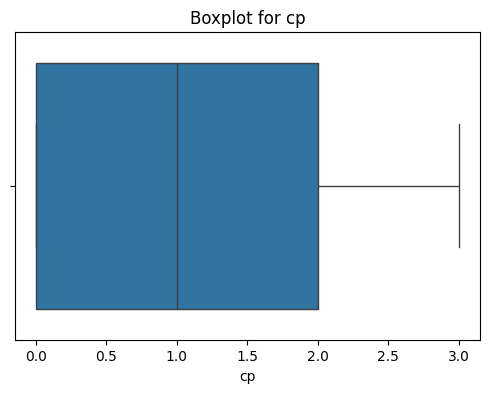

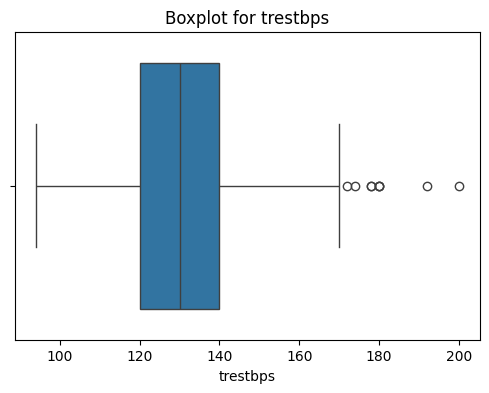

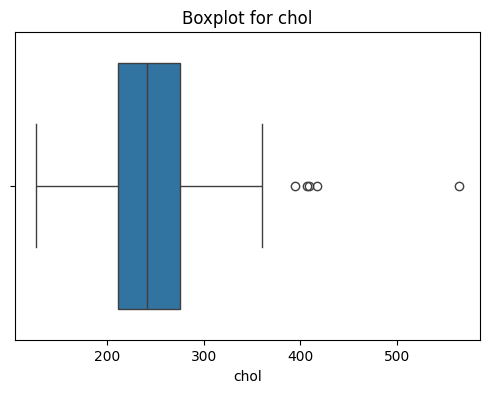

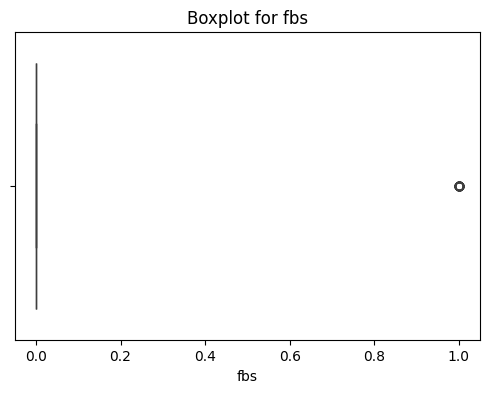

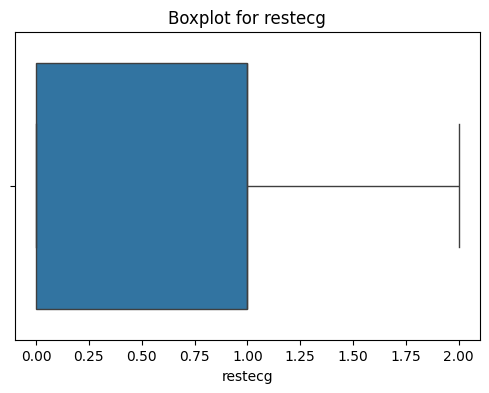

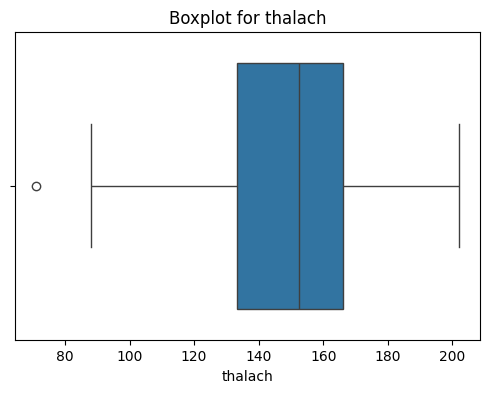

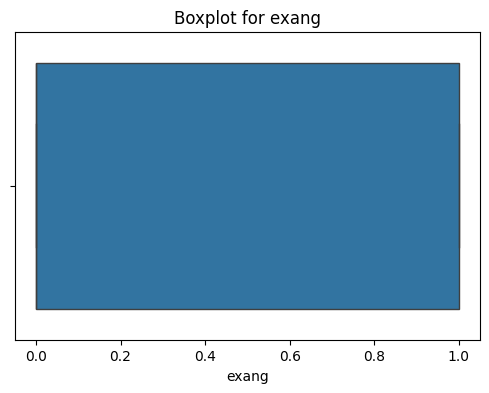

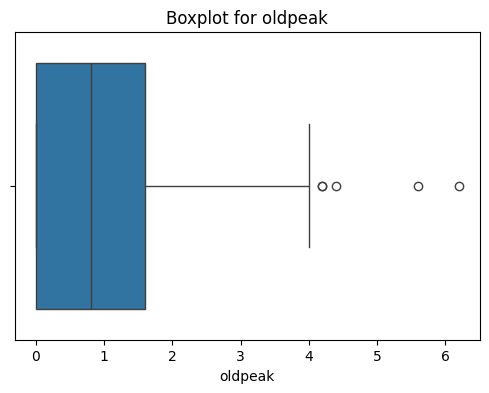

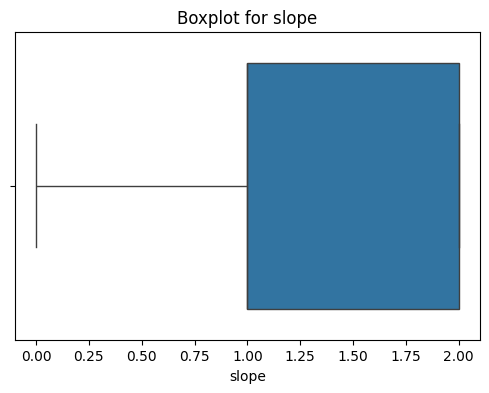

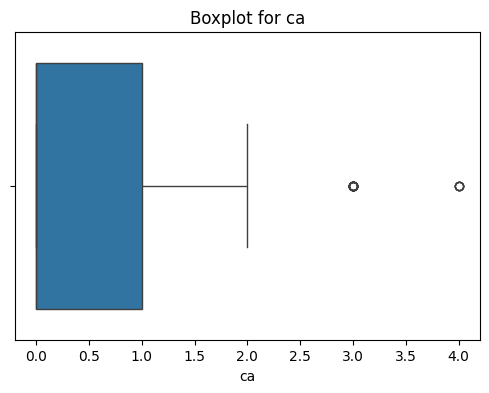

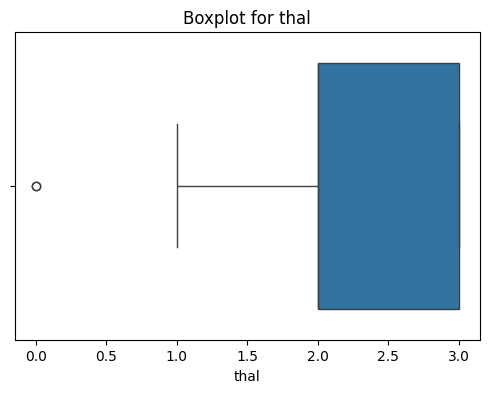

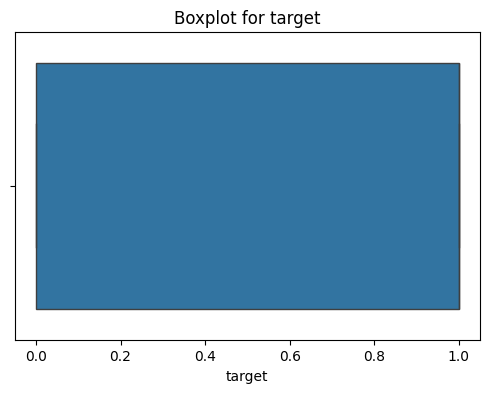

In [25]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [26]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  212.0    0        1    168.0      0      1.0   
1   53    1   0       140  203.0    0        0    155.0      1      3.1   
2   70    1   0       145  174.0    0        1    125.0      1      2.6   
3   61    1   0       148  203.0    0        1    161.0      0      0.0   
4   62    0   0       138  294.0    0        1    106.0      0      1.9   

   slope   ca  thal  target  
0      2  2.0   3.0       0  
1      0  0.0   3.0       0  
2      0  0.0   3.0       0  
3      2  1.0   3.0       0  
4      1  2.5   2.0       0  


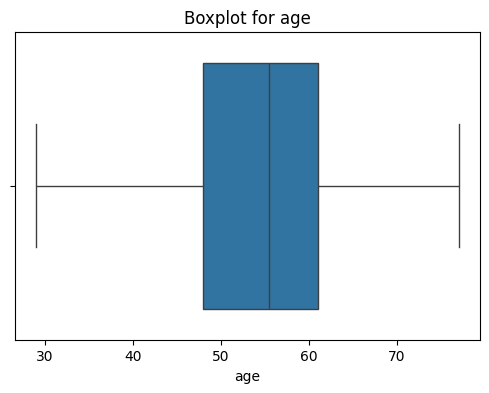

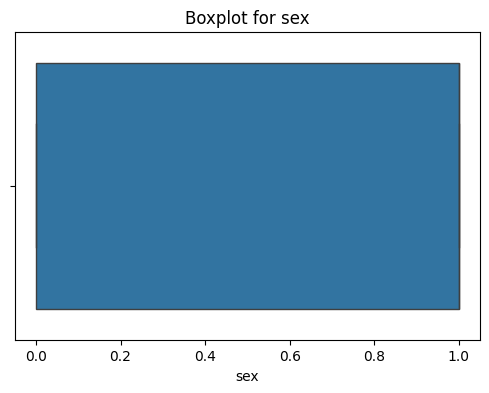

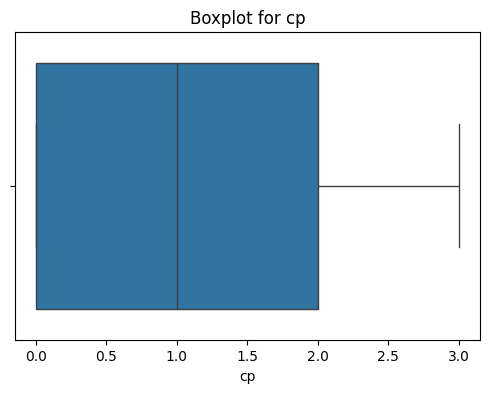

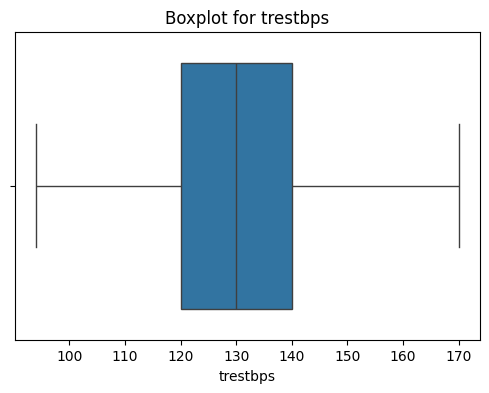

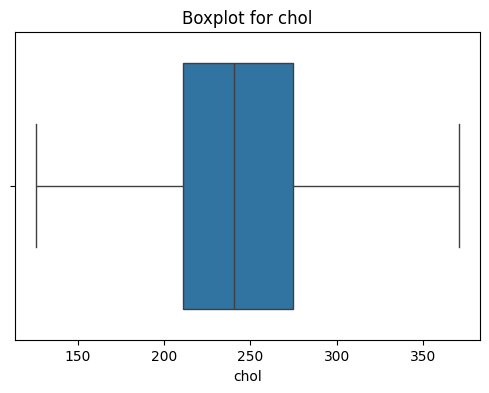

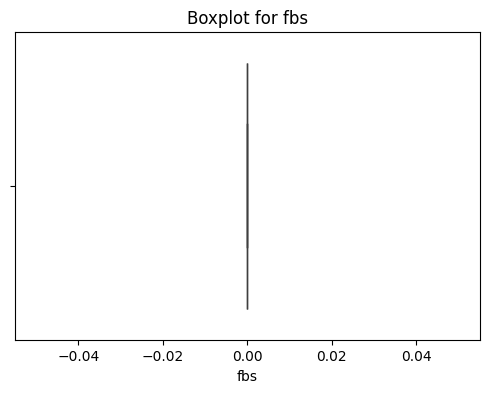

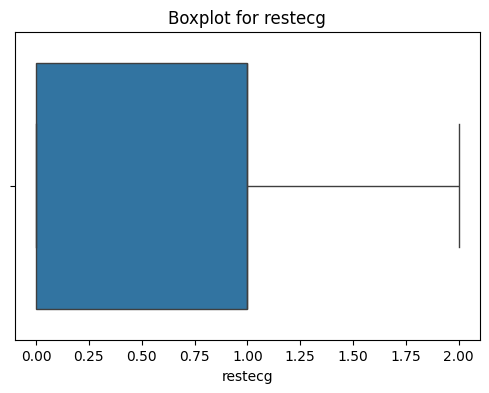

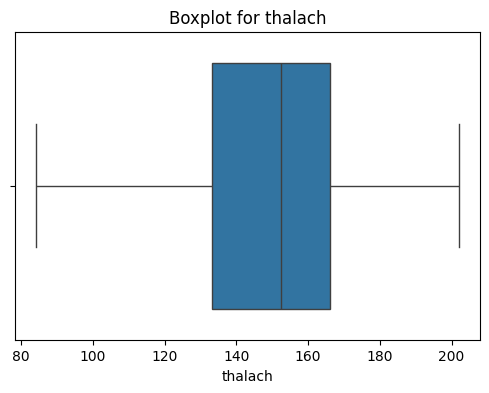

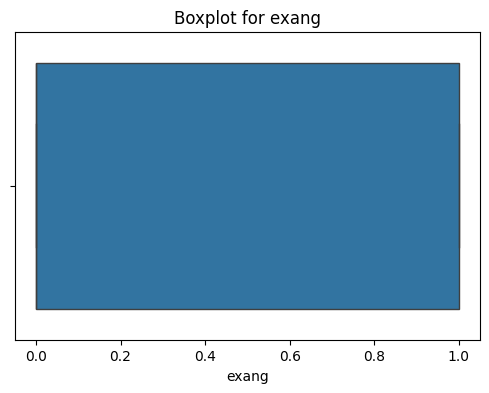

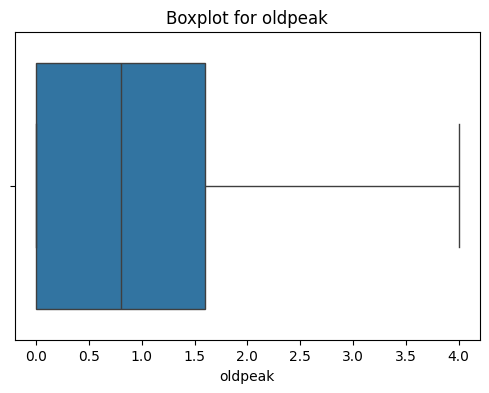

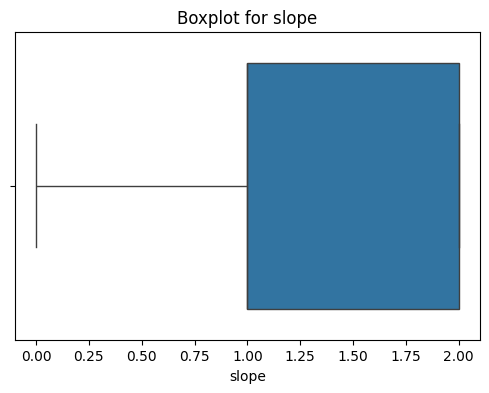

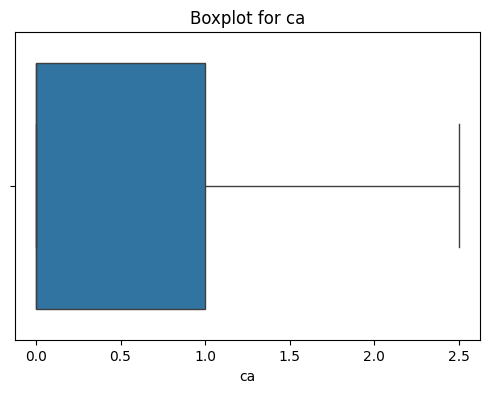

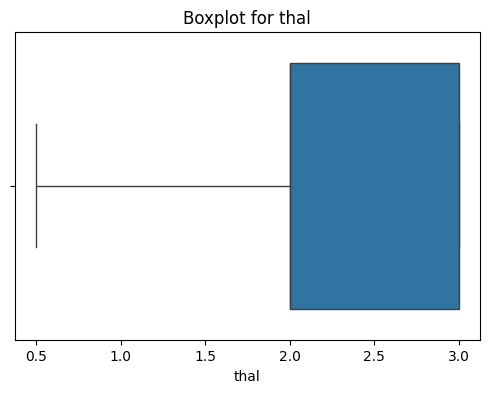

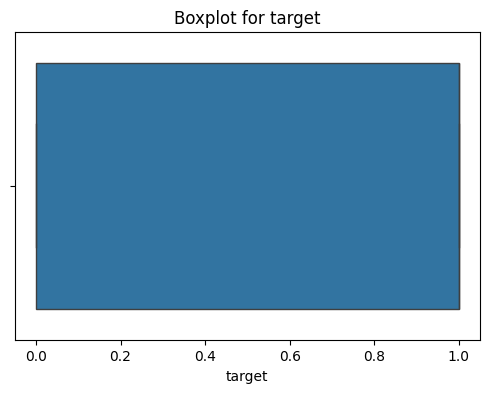

In [27]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [29]:
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [42]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate=0.3)
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 83.61%
Logistic Regression Accuracy: 83.61%
SVM Accuracy: 78.69%
KNN Accuracy: 63.93%
Naive Bayes Accuracy: 85.25%
Decision Tree Accuracy: 73.77%
AdaBoost Accuracy: 80.33%


### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grids = {
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {},
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.3, 0.5]
    }
}

# Loop through each classifier and apply GridSearchCV
for name, clf in classifiers.items():
    print(f"Training {name} with hyperparameter tuning...")
    
    # Get the appropriate parameter grid
    param_grid = param_grids.get(name, {})
    
    # If the classifier has parameters to tune, perform GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        
        # Get the best model and evaluate
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Best Accuracy: {accuracy * 100:.2f}% with best params: {grid_search.best_params_}')
    else:
        # If no hyperparameters to tune, just fit the model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Training Random Forest Classifier with hyperparameter tuning...
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Random Forest Classifier Best Accuracy: 85.25% with best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Training Logistic Regression with hyperparameter tuning...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Logistic Regression Best Accuracy: 85.25% with best params: {'C': 0.1, 'solver': 'liblinear'}
Training SVM with hyperparameter tuning...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
SVM Best Accuracy: 81.97% with best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training KNN with hyperparameter tuning...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN Best Accuracy: 63.93% with best params: {'n_neighbors': 5, 'weights': 'distance'}
Training Naive Bayes with hyperparameter tuning...
Naive Bayes Accuracy: 85.25%
Training Decision Tree with hyperparameter tuning...
Fittin

In [15]:
#END